## Mounting Google Drive

In [1]:
#Working in the Colab so saved the data on google drive!!
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
# Libraries
#-------------------------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,f1_score
sns.set(rc={'figure.figsize':(18,12)})

## Loading Train & Test Data

In [0]:
df_train=pd.read_csv("/gdrive/My Drive/Colab Notebooks/train.csv")
df_test=pd.read_csv('/gdrive/My Drive/Colab Notebooks/test.csv')

## Descriptive Analysis

In [4]:
df_train.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [5]:
print("The SHAPE OF DATA:",df_train.shape)
print("---------------------------------")
print(df_train.columns)

The SHAPE OF DATA: (233154, 41)
---------------------------------
Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')


In [6]:
df_train.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.0,233154.00000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,1.0,0.84032,0.075577,0.144943,0.023242,0.002127,289.462994,2.440636,1.039896,0.156549,1.659001e+05,2.185039e+05,2.180659e+05,0.059081,0.027703,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,0.0,0.36631,0.264320,0.352044,0.150672,0.046074,338.374779,5.217233,1.941496,0.548787,9.422736e+05,2.374794e+06,2.377744e+06,0.626795,0.316057,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,1.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.678296e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,678.000000,3.000000,1.000000,0.000000,3.500650e+04,6.250000e+04,6.080000e+04,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,1.0,1.00000,1.000000,1.000000,1.000000,1.000000,890.000000,453.000000,144.000000,25.000000,9.652492e+07,1.000000e+09,1.000000e+09,52.000000,36.000000,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
UniqueID                               233154 non-null int64
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
branch_id                              233154 non-null int64
supplier_id                            233154 non-null int64
manufacturer_id                        233154 non-null int64
Current_pincode_ID                     233154 non-null int64
Date.of.Birth                          233154 non-null object
Employment.Type                        225493 non-null object
DisbursalDate                          233154 non-null object
State_ID                               233154 non-null int64
Employee_code_ID                       233154 non-null int64
MobileNo_Avl_Flag                      233154 non-null int64
Aadhar_flag                   

Only Employment.Type has null entry which can be ignored as it has ver few null entry!!

In [8]:
# Checking for Numerical variable & Categorical variable
numeric_val = df_train._get_numeric_data()
cat_val = set(df_train.columns) - set(numeric_val)

print("Numeric Columns : ",numeric_val.columns)
print("Categorical Columns : ",cat_val)

Numeric Columns :  Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'State_ID',
       'Employee_code_ID', 'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag',
       'VoterID_flag', 'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS',
       'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT',
       'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS',
       'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT',
       'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')
Categorical Columns :  {'Date.of.Birth', 'AVERAGE.ACCT.AGE', 'DisbursalDate', 'PERFORM_CNS.SCORE.DESCRIPTION', 'CREDIT.HISTORY.LENGTH', 'Employment.Type'}


**Removing unneccsaary columns like various ID's..!**

In [0]:
df_train = df_train.drop(["UniqueID","branch_id","supplier_id","manufacturer_id","Current_pincode_ID","State_ID","Employee_code_ID",
                          "MobileNo_Avl_Flag","Aadhar_flag","PAN_flag","VoterID_flag","Passport_flag"],axis = 1)
df_test = df_test.drop(["UniqueID","branch_id","supplier_id","manufacturer_id","Current_pincode_ID","State_ID","Employee_code_ID",
                          "MobileNo_Avl_Flag","Aadhar_flag","PAN_flag","VoterID_flag","Passport_flag"],axis = 1)

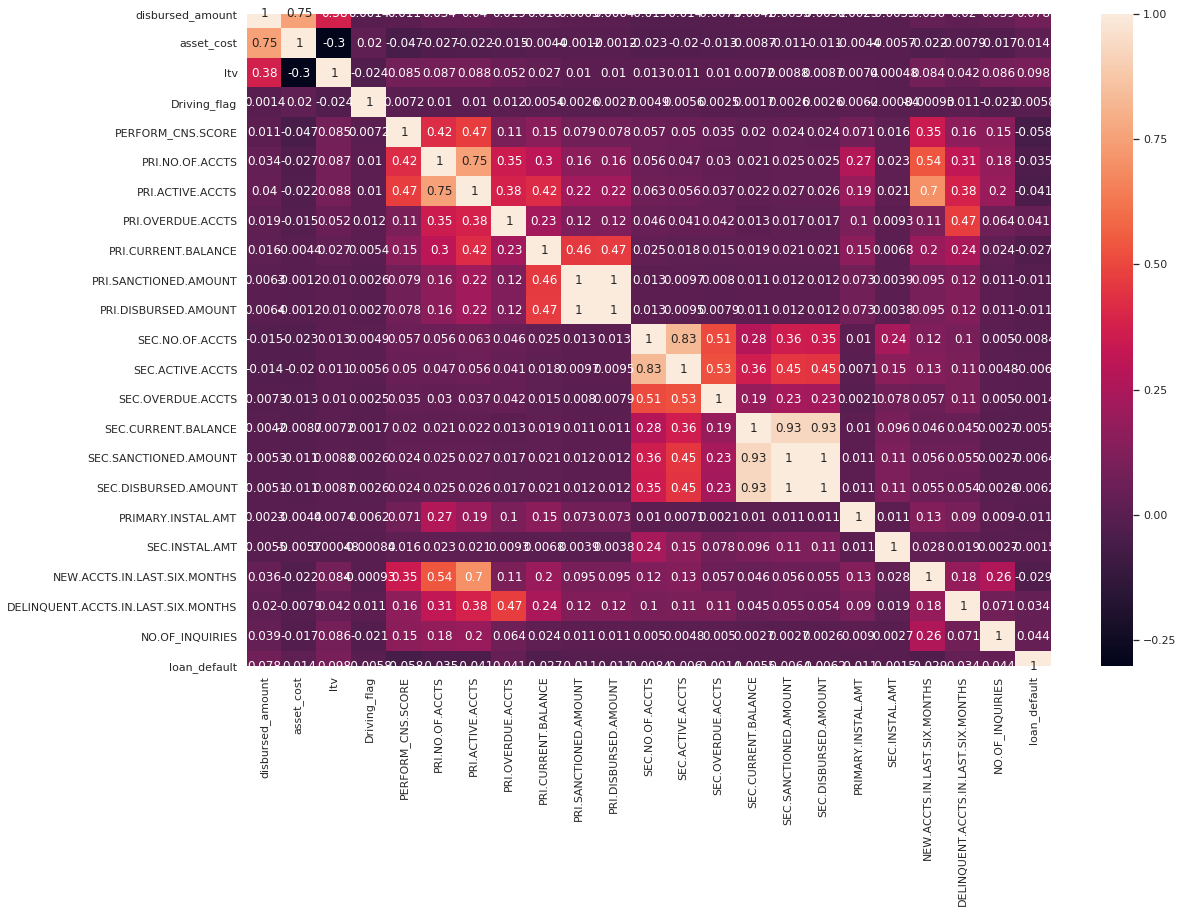

In [10]:
sns.heatmap(df_train.corr(),annot = True)

Highly correlated feautres can be seen!! Need to do feature engineering and remove multicollinearity

## Handling Missing Value 

In [11]:
def check_null(df):
  print(df.isnull().sum())

print("TRAIN DATA")  
print("---------------")
check_null(df_train)

print("\nTEST DATA")
print("---------------")
check_null(df_test)

TRAIN DATA
---------------
disbursed_amount                          0
asset_cost                                0
ltv                                       0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
Driving_flag                              0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                          0
PRI.OVERDUE.ACCTS                         0
PRI.CURRENT.BALANCE                       0
PRI.SANCTIONED.AMOUNT                     0
PRI.DISBURSED.AMOUNT                      0
SEC.NO.OF.ACCTS                           0
SEC.ACTIVE.ACCTS                          0
SEC.OVERDUE.ACCTS                         0
SEC.CURRENT.BALANCE                       0
SEC.SANCTIONED.AMOUNT                     0
SEC.DISBURSED.AMOUNT                      0
PRIMARY.INSTAL.AMT                        0
SEC.I

We can see only Employment type has null values which be replaced by mode.!


In [0]:
def replacing_mode(ecol):
  max_val = ecol.mode()
  ecol = ecol.fillna(max_val[0])
  return ecol
  
df_train["Employment.Type"] = replacing_mode(df_train["Employment.Type"])
df_test["Employment.Type"] = replacing_mode(df_train["Employment.Type"])

## Exploratory Data Analyis -- Part 1

In [0]:
sns.set(rc={'figure.figsize':(8,5)})

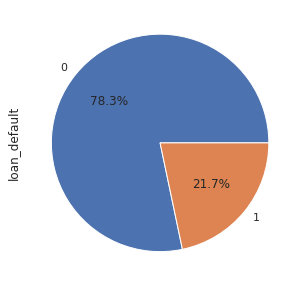

In [14]:
df_train["loan_default"].value_counts().plot(kind = 'pie',autopct = "%1.1f%%")

In [0]:
sns.set(rc={'figure.figsize':(15,5)})

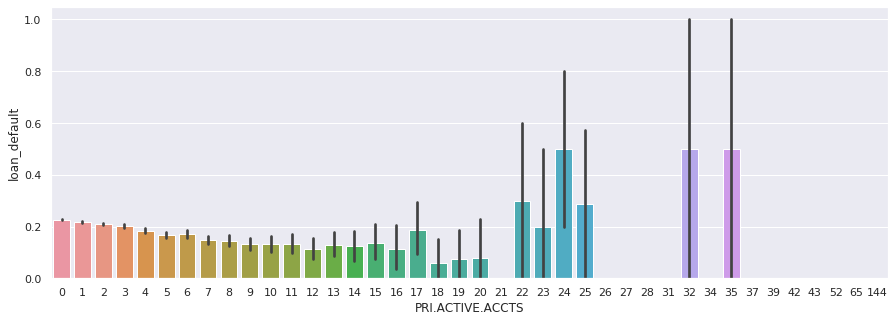

In [16]:
sns.barplot(x = df_train["PRI.ACTIVE.ACCTS"], y = df_train["loan_default"])

We can observe as no of active accounts increases the chances for loan default also increase!

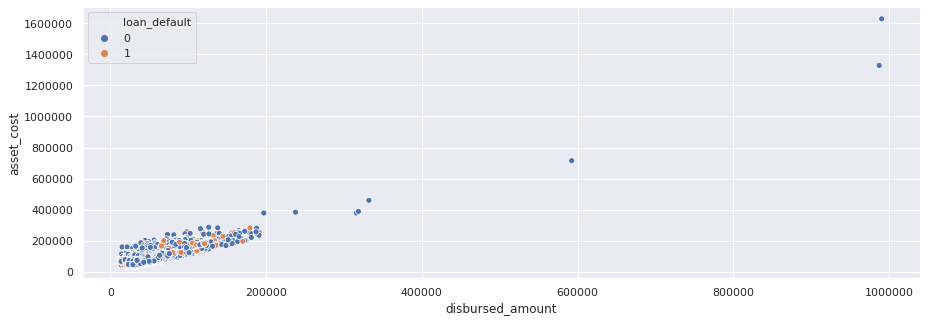

In [17]:
sns.scatterplot(x = df_train["disbursed_amount"], y = df_train["asset_cost"], hue=df_train["loan_default"])

The probability of loan deault decrease as the amount is large.. Because more asset cost we can get idea that person is able to pay the loan amount!!

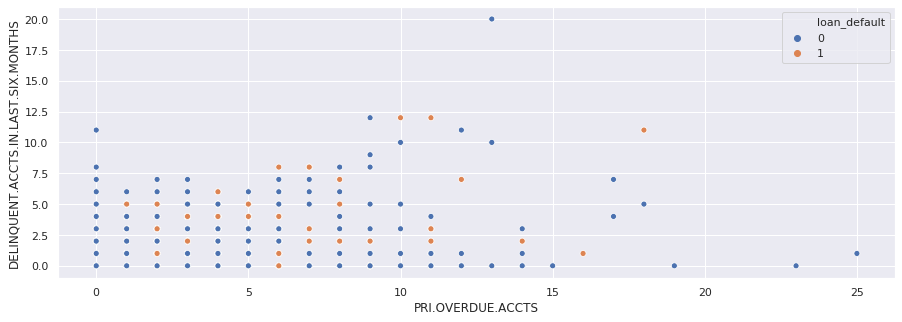

In [18]:
sns.scatterplot(x = df_train["PRI.OVERDUE.ACCTS"], y = df_train["DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS"],hue=df_train["loan_default"])

We can see that deliquent account & Overdue account has some relation!! And as the number of account increases the loan default probability also increases..!

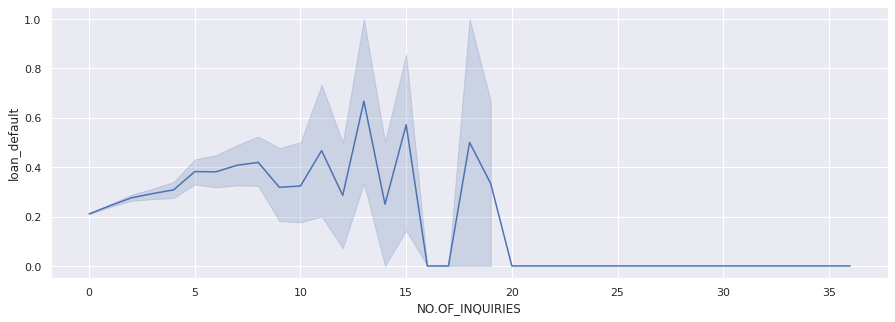

In [19]:
sns.lineplot(x = df_train["NO.OF_INQUIRIES"], y = df_train["loan_default"])

We can observe that No of inquries doesnt affect will the person do default or not!

## Feature Engineering

In [0]:
# Handling The Balance of both the account Primary & Secondary
df_train["PRI.CURRENT.BALANCE"] = df_train["PRI.CURRENT.BALANCE"] + (df_train["PRI.SANCTIONED.AMOUNT"] - df_train["PRI.DISBURSED.AMOUNT"])
df_train["SEC.CURRENT.BALANCE"] = df_train["SEC.CURRENT.BALANCE"] + (df_train["SEC.SANCTIONED.AMOUNT"] - df_train["SEC.DISBURSED.AMOUNT"])

df_test["PRI.CURRENT.BALANCE"] = df_test["PRI.CURRENT.BALANCE"] +  (df_test["PRI.SANCTIONED.AMOUNT"] - df_test["PRI.DISBURSED.AMOUNT"])
df_test["SEC.CURRENT.BALANCE"] = df_test["SEC.CURRENT.BALANCE"] + (df_test["SEC.SANCTIONED.AMOUNT"] - df_test["SEC.DISBURSED.AMOUNT"])

df_train = df_train.drop(["PRI.SANCTIONED.AMOUNT","PRI.DISBURSED.AMOUNT","SEC.SANCTIONED.AMOUNT","SEC.DISBURSED.AMOUNT"],axis = 1)
df_test = df_test.drop(["PRI.SANCTIONED.AMOUNT","PRI.DISBURSED.AMOUNT","SEC.SANCTIONED.AMOUNT","SEC.DISBURSED.AMOUNT"],axis = 1)

In [0]:
# Handling the Total Number Accounts of both Primary & Secondary
df_train["PRI.NO.OF.ACCTS"] = df_train["PRI.NO.OF.ACCTS"] + (df_train["PRI.ACTIVE.ACCTS"] + df_train["PRI.OVERDUE.ACCTS"])
df_train["SEC.NO.OF.ACCTS"] = df_train["SEC.NO.OF.ACCTS"] + (df_train["SEC.ACTIVE.ACCTS"] + df_train["SEC.OVERDUE.ACCTS"])

df_test["PRI.NO.OF.ACCTS"] = df_test["PRI.NO.OF.ACCTS"]  + (df_test["PRI.ACTIVE.ACCTS"] + df_test["PRI.OVERDUE.ACCTS"])
df_test["SEC.NO.OF.ACCTS"] = df_test["SEC.NO.OF.ACCTS"]  + (df_test["SEC.ACTIVE.ACCTS"] + df_test["SEC.OVERDUE.ACCTS"])

df_train = df_train.drop(["PRI.ACTIVE.ACCTS","PRI.OVERDUE.ACCTS","SEC.ACTIVE.ACCTS","SEC.OVERDUE.ACCTS"],axis = 1)
df_test =  df_test.drop(["PRI.ACTIVE.ACCTS","PRI.OVERDUE.ACCTS","SEC.ACTIVE.ACCTS","SEC.OVERDUE.ACCTS"],axis = 1)

In [0]:
# Also combining New Accounts in Last Six Month to primary no of accounts because they both are related
df_train["PRI.NO.OF.ACCTS"] = df_train["PRI.NO.OF.ACCTS"] + df_train["NEW.ACCTS.IN.LAST.SIX.MONTHS"]
df_test["PRI.NO.OF.ACCTS"] =  df_test["PRI.NO.OF.ACCTS"] + df_test["NEW.ACCTS.IN.LAST.SIX.MONTHS"]

df_train = df_train.drop("NEW.ACCTS.IN.LAST.SIX.MONTHS",axis = 1)
df_test = df_test.drop("NEW.ACCTS.IN.LAST.SIX.MONTHS",axis = 1)

In [0]:
# Deriving the Age column from Date of Birth
def calculate_age(dob):
    if int(dob[-2:]) < 19:
        year = int('20' + dob[-2:])
    else:
        year = int('19' + dob[-2:])    
    return (pd.to_datetime('today').year - year)

df_train['age'] = df_train['Date.of.Birth'].apply(calculate_age)
df_test['age'] = df_test['Date.of.Birth'].apply(calculate_age)

del df_train['Date.of.Birth'] 
del df_test['Date.of.Birth'] 

In [0]:
# Converting Average Account & credit history column into number of days
def change_col_month(col):
    year = int(col.split()[0].replace('yrs',''))
    month = int(col.split()[1].replace('mon',''))
    return year*12+month

df_train['AVERAGE.ACCT.AGE'] = df_train['AVERAGE.ACCT.AGE'].apply(change_col_month)
df_test['AVERAGE.ACCT.AGE'] = df_test['AVERAGE.ACCT.AGE'].apply(change_col_month)
df_train['CREDIT.HISTORY.LENGTH'] = df_train['CREDIT.HISTORY.LENGTH'].apply(change_col_month)
df_test['CREDIT.HISTORY.LENGTH'] = df_test['CREDIT.HISTORY.LENGTH'].apply(change_col_month)

In [0]:
# Converting into bins  : CNS SCORE & LTV
df_train['PERFORM_CNS.SCORE.BINS']=pd.cut(df_train['PERFORM_CNS.SCORE'],3,labels=['Bad','Doubtful','Excellent']).astype(np.object)
df_test['PERFORM_CNS.SCORE.BINS']=pd.cut(df_test['PERFORM_CNS.SCORE'],3,labels=['Bad','Doubtful','Excellent']).astype(np.object)

df_train['ltv.BINS']=pd.cut(df_train['ltv'],3,labels=['Low','Medium','High']).astype(np.object)
df_test['ltv.BINS']=pd.cut(df_test['ltv'],3,labels=['Low','Medium','High']).astype(np.object)

## Exploratory Data Analysis -- Part 2

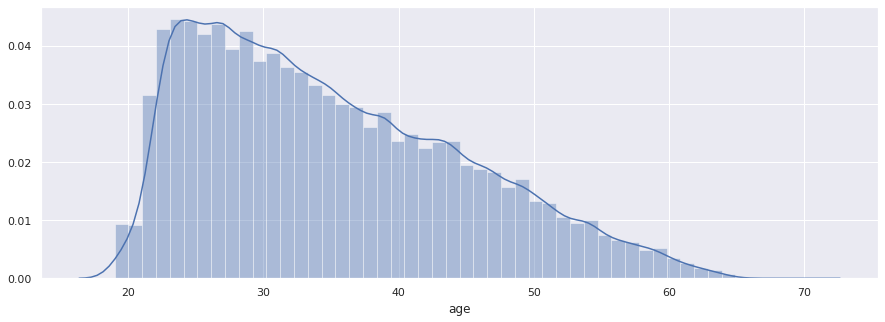

In [26]:
# Age Distribution
sns.distplot(df_train.age)

We can observe that the data is positively skewed .. We can young age people are having more vehicle than oldie.... 20-30 Age bin has highest posession of vehicle..!

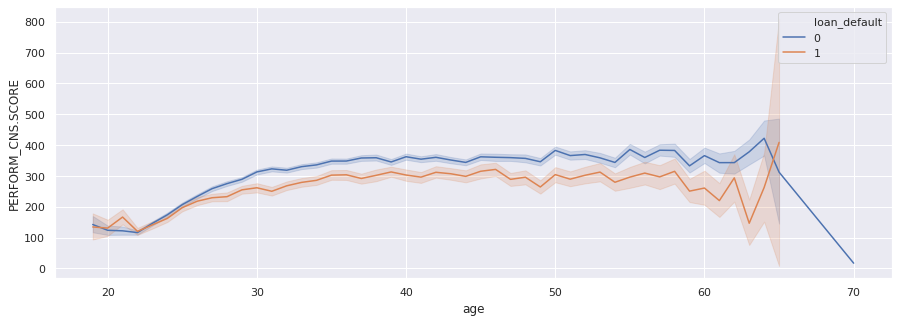

In [27]:
# Performance Score & Age relation
sns.lineplot( x = df_train["age"] , y = df_train["PERFORM_CNS.SCORE"], hue = df_train["loan_default"])

We can observe tha there is no relation between age and CNS score

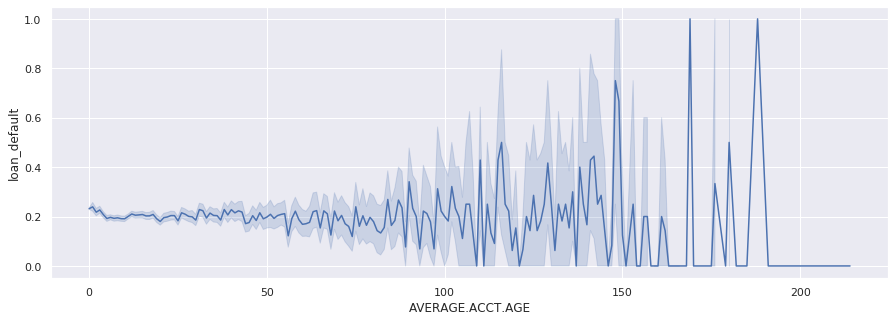

In [28]:
#Average Account Age
df = df_train[df_train['AVERAGE.ACCT.AGE']<225]
sns.lineplot(x = df["AVERAGE.ACCT.AGE"], y = df["loan_default"])

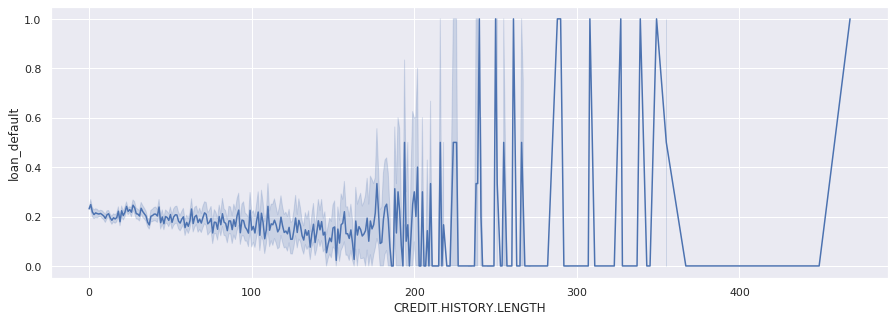

In [29]:
#Credit History
sns.lineplot(x = df_train["CREDIT.HISTORY.LENGTH"],y = df_train["loan_default"])

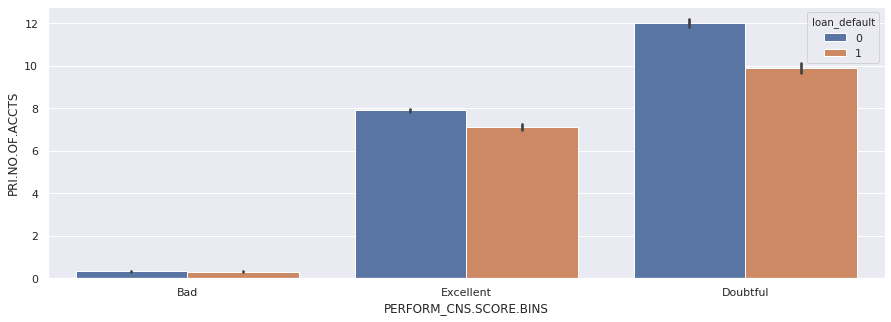

In [30]:
# Performance score & Primary account
sns.barplot(y = df_train["PRI.NO.OF.ACCTS"], x = df_train["PERFORM_CNS.SCORE.BINS"], hue = df_train["loan_default"])

### Random Forest

## Train-Test Split

In [0]:
X = df_train[["disbursed_amount","Employment.Type","PRI.NO.OF.ACCTS","PRI.CURRENT.BALANCE","SEC.NO.OF.ACCTS","SEC.CURRENT.BALANCE",                    
              "PRIMARY.INSTAL.AMT","SEC.INSTAL.AMT","AVERAGE.ACCT.AGE","CREDIT.HISTORY.LENGTH","age","PERFORM_CNS.SCORE.BINS",         
               "ltv.BINS"]]
y = df_train["loan_default"]
X = pd.get_dummies(data=X,columns=['Employment.Type','ltv.BINS','PERFORM_CNS.SCORE.BINS'],drop_first=True)
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.3,random_state = 10)

## Imbalance Class Problem

In [32]:
from imblearn.over_sampling import SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=10)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


Before OverSampling, counts of label '1': 35421
Before OverSampling, counts of label '0': 127786 

After OverSampling, the shape of train_X: (255572, 15)
After OverSampling, the shape of train_y: (255572,) 

After OverSampling, counts of label '1': 127786
After OverSampling, counts of label '0': 127786


## Model Building

In [33]:
Rf = RandomForestClassifier(max_depth = 4 ,random_state=100)
Rf.fit(X_train_res, y_train_res.ravel())
y_pred = Rf.predict(X_val)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [34]:
print(classification_report(y_val,y_pred))
print('Random Forest AUC ROC Score: {}'.format(roc_auc_score(y_val,y_pred)))

              precision    recall  f1-score   support

           0       0.82      0.62      0.70     54757
           1       0.26      0.50      0.35     15190

    accuracy                           0.59     69947
   macro avg       0.54      0.56      0.52     69947
weighted avg       0.70      0.59      0.62     69947

Random Forest AUC ROC Score: 0.557176374671009


### CatBoost

1. CatBoost is a machine learning algorithm that uses gradient boosting on  decision trees.
2. CatBoost converts categorical values into numbers using various statistics on combinations of categorical features and combinations of categorical and numerical features.
3.It reduces the need for extensive hyper-parameter tuning and lower the chances of overfitting.
4.Traing time and prediction time is much faster than Random forest and XGBoost.



In [35]:
pip install catboost

     |████████████████████████████████| 62.9MB 36kB/s 


## Train Test Split

In [0]:
X = df_train[["disbursed_amount","Employment.Type","PRI.NO.OF.ACCTS","PRI.CURRENT.BALANCE","SEC.NO.OF.ACCTS","SEC.CURRENT.BALANCE",                    
              "PRIMARY.INSTAL.AMT","SEC.INSTAL.AMT","AVERAGE.ACCT.AGE","CREDIT.HISTORY.LENGTH","age","PERFORM_CNS.SCORE.BINS",         
               "ltv.BINS"]]
y = df_train["loan_default"]
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.3,random_state = 10)

In [0]:
dftest = df_test[["disbursed_amount","Employment.Type","PRI.NO.OF.ACCTS","PRI.CURRENT.BALANCE","SEC.NO.OF.ACCTS","SEC.CURRENT.BALANCE",                    
              "PRIMARY.INSTAL.AMT","SEC.INSTAL.AMT","AVERAGE.ACCT.AGE","CREDIT.HISTORY.LENGTH","age","PERFORM_CNS.SCORE.BINS",         
               "ltv.BINS"]]

In [38]:
categorical_features_indices = np.where(X_train.dtypes =='object')[0]
categorical_features_indices

array([ 1, 11, 12])

## Model Building

In [39]:
from catboost import CatBoostClassifier
m=CatBoostClassifier(n_estimators=1000,random_state=10,eval_metric='AUC',max_depth=6,od_wait=50
                     ,l2_leaf_reg=5,cat_features=categorical_features_indices,random_strength=100,
                     use_best_model=True)
m.fit(X_train,y_train,eval_set=[(X_train,y_train.ravel()),(X_val, y_val)], early_stopping_rounds=100,verbose=100)
p2=m.predict(X_val)
p2
print(classification_report(y_val,p2))
roc_auc_score(y_val,p2)

0:	test: 0.5227594	test1: 0.5225951	best: 0.5225951 (0)	total: 313ms	remaining: 5m 13s
100:	test: 0.6058410	test1: 0.6095514	best: 0.6098527 (79)	total: 16.7s	remaining: 2m 28s
200:	test: 0.6071229	test1: 0.6103867	best: 0.6103867 (199)	total: 33.2s	remaining: 2m 12s
300:	test: 0.6081218	test1: 0.6110464	best: 0.6110569 (298)	total: 50.4s	remaining: 1m 57s
400:	test: 0.6095212	test1: 0.6121509	best: 0.6121509 (400)	total: 1m 8s	remaining: 1m 41s
500:	test: 0.6108517	test1: 0.6132977	best: 0.6132977 (499)	total: 1m 24s	remaining: 1m 24s
600:	test: 0.6180800	test1: 0.6176620	best: 0.6176620 (600)	total: 1m 45s	remaining: 1m 10s
700:	test: 0.6237785	test1: 0.6193878	best: 0.6193878 (700)	total: 2m 8s	remaining: 54.7s
800:	test: 0.6277081	test1: 0.6200150	best: 0.6200336 (789)	total: 2m 30s	remaining: 37.5s
900:	test: 0.6307737	test1: 0.6203832	best: 0.6203832 (900)	total: 2m 53s	remaining: 19s
999:	test: 0.6333925	test1: 0.6204953	best: 0.6205141 (981)	total: 3m 15s	remaining: 0us

bestTe

0.500014653887113

## 5 Fold Cross Validation

In [40]:
err=[]
y_pred_total=[]
from sklearn.model_selection import KFold,StratifiedKFold
fold=StratifiedKFold(n_splits=5,shuffle=True,random_state=100)
i=1
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    m=CatBoostClassifier(n_estimators=1000,random_state=100,eval_metric='AUC',max_depth=6,od_wait=50
                     ,l2_leaf_reg=10,cat_features=categorical_features_indices,random_strength=100,
                     use_best_model=True)
    m.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=100,verbose=100)
    preds=m.predict_proba(X_test)[:,-1]
    print("err: ",roc_auc_score(y_test,preds))
    err.append(roc_auc_score(y_test,preds))
    p = m.predict_proba(dftest)[:,-1]
    y_pred_total.append(p)

0:	test: 0.5500129	test1: 0.5495596	best: 0.5495596 (0)	total: 180ms	remaining: 3m
100:	test: 0.6068126	test1: 0.6071225	best: 0.6071513 (91)	total: 19.4s	remaining: 2m 53s
200:	test: 0.6085031	test1: 0.6081898	best: 0.6083783 (180)	total: 37.3s	remaining: 2m 28s
300:	test: 0.6099693	test1: 0.6092989	best: 0.6092989 (300)	total: 55.2s	remaining: 2m 8s
400:	test: 0.6107915	test1: 0.6098608	best: 0.6098608 (400)	total: 1m 13s	remaining: 1m 49s
500:	test: 0.6122019	test1: 0.6110633	best: 0.6110633 (500)	total: 1m 32s	remaining: 1m 32s
600:	test: 0.6183202	test1: 0.6147482	best: 0.6147482 (600)	total: 1m 54s	remaining: 1m 15s
700:	test: 0.6234297	test1: 0.6167055	best: 0.6167249 (698)	total: 2m 19s	remaining: 59.5s
800:	test: 0.6268822	test1: 0.6176843	best: 0.6176871 (797)	total: 2m 44s	remaining: 40.9s
900:	test: 0.6293379	test1: 0.6182811	best: 0.6182811 (900)	total: 3m 9s	remaining: 20.8s
999:	test: 0.6317869	test1: 0.6186699	best: 0.6186720 (998)	total: 3m 34s	remaining: 0us

bestTest

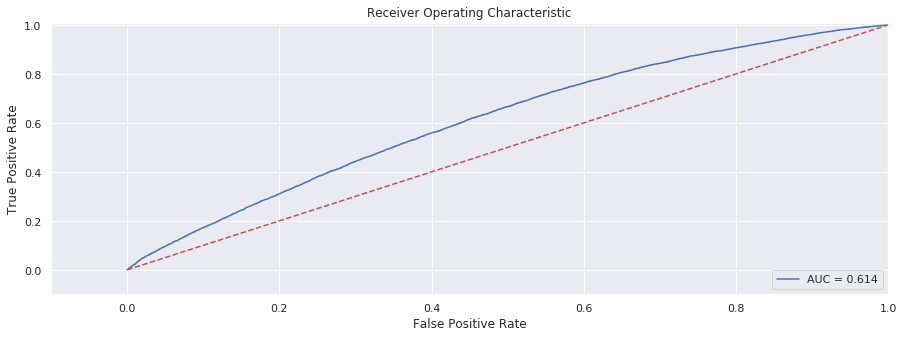

In [41]:
fpr, tpr, thresholds = roc_curve(y_test,preds)
roc_auc = auc(fpr,tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## The best ROC Curve is 0.616!!!!